# Hidden Markov Models
_Andrew Cachia, Feb 2019_

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt  
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
from scipy.optimize import minimize
from scipy.special import ndtri
from scipy.stats import norm
from hmmlearn.hmm import GaussianHMM

#### Downloading S&P 500 index data and calculating returns

In [21]:
date_start = "2008-01-01"
date_end = "2017-12-31"

symbols = ['^GSPC']

data = pd.DataFrame()
yf.pdr_override() 
data = pdr.get_data_yahoo(symbols, start=date_start, end=date_end)

returns = data['Adj Close'] / data['Adj Close'].shift(1)
returns = np.log(returns)
returns = returns.dropna()
returns.head()

[*********************100%***********************]  1 of 1 downloaded


Date
2008-01-02   -0.014543
2008-01-03    0.000000
2008-01-04   -0.024858
2008-01-07    0.003218
2008-01-08   -0.018523
Name: Adj Close, dtype: float64

#### Volatility rolling time window

In [25]:
volList = returns.rolling(10).std(ddof=0)
volList = volList.dropna()
volList.head()

Date
2008-01-15    0.014119
2008-01-16    0.013838
2008-01-17    0.015459
2008-01-18    0.014427
2008-01-22    0.014118
Name: Adj Close, dtype: float64

#### Creating two Guassian HMMs with a different number of latent states/components

In [45]:
def create_model(Q, numOfComponents):
    X = np.reshape(Q.tolist(),[-1,1])
    
    # Make an HMM instance and execute fit
    model = GaussianHMM(n_components=numOfComponents, n_iter=1000).fit(X)
    # Predict the optimal sequence of internal hidden state
    hidden_states = model.predict(X)
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(111)
 
    xs = np.arange(len(Q))
    
    if numOfComponents==2:
        masks = hidden_states == 0
        ax.scatter(xs[masks], Q[masks], c='r')
        masks = hidden_states == 1
        ax.scatter(xs[masks], Q[masks], c='b')
        
    if numOfComponents==3:
        masks = hidden_states == 0
        ax.scatter(xs[masks], Q[masks], c='r')
        masks = hidden_states == 1
        ax.scatter(xs[masks], Q[masks], c='b')
        masks = hidden_states == 2
        ax.scatter(xs[masks], Q[masks], c='g')
        
    ax.plot(xs, Q, c='k')
     
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')

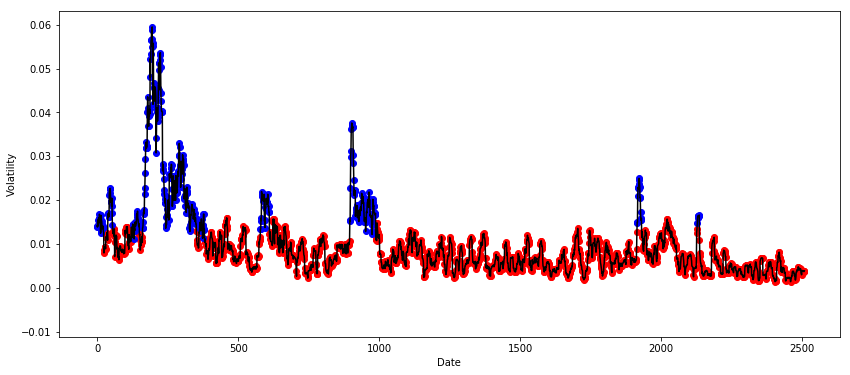

In [46]:
create_model(volList,2)

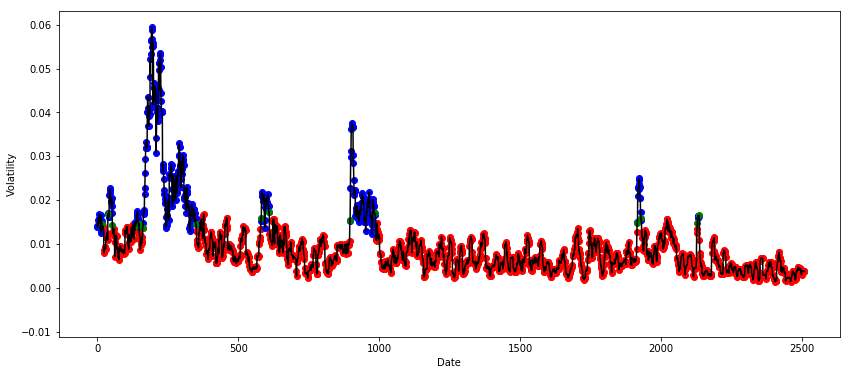

In [44]:
create_model(volList,3)

The model seems to be finding two principal volatility regimes. At certain points, the volaility is shown as being relatively stable, with a consistent and precitable fluctuation (shown in red on the charts). However at certain points, the volatility shoots up and determines periods where the market's volatility is highly unpredicatable.

The green points on the second chart (barely visible), indicate the third component, which doesn't seem to add much value in this particular scenario.